In [3]:
import re
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import MeCab
import random
import codecs
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

教師データを用意

In [6]:
import csv

test_story =[]
target_age_test = []

with open('test1.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        test_story.append(row[1])
        if row[2] == '':
            target_age_test.append(None)
        else:
            target_age_test.append(float(row[2]))

target_age_test.pop(0)
print(len(test_story))
print(target_age_test)

101
[None, 4.0, 4.0, 4.0, None, 4.0, None, None, None, None, 1.0, 3.0, 4.0, None, None, 3.5, None, None, None, None, 4.0, None, 4.0, None, None, 3.5, 4.0, None, 4.0, None, None, None, 7.0, None, None, None, 4.5, 4.0, None, 5.0, None, None, 4.0, None, 4.0, None, None, 3.5, 3.0, 3.5, None, 4.0, 4.0, None, 4.0, None, 5.0, 4.5, None, 2.5, 7.0, 4.0, None, None, 4.0, None, 4.0, None, None, None, None, 4.0, None, 4.0, 4.0, None, None, None, 3.0, None, None, None, None, None, 4.0, 4.0, None, 3.0, None, 4.0, None, 4.0, 4.0, 8.0, None, None, None, 4.0, 4.0, None]


童話の名前を取得

In [8]:
import os

path_test = "./test"

files_test = os.listdir(path_test)
print(type(files_test))  # <class 'list'>
print(files_test)        # ['dir1', 'dir2', 'file1', 'file2.txt', 'file3.jpg']

print(files_test[0])
print(len(files_test))

<class 'list'>
['おおきな木とむすめ.txt', 'ももたろう.txt', 'ぶんぶくちゃがま.txt', 'かぜのかみとこども.txt', 'どくめし.txt', 'わらしべちょうじゃ.txt', 'かまいけ.txt', '年をとったライオンとキツネの話.txt', 'ネコがネズミをおいかけるわけ.txt', 'こしおれすずめ.txt', 'びんぼう神とふくの神.txt', 'テングのすもう.txt', 'かぐや姫.txt', 'たからばし.txt', 'はなききおとこ.txt', 'ききみみずきん.txt', 'きんのつばき.txt', 'たのく.txt', 'じゃがいもどろぼう.txt', 'さんねんねたろう.txt', 'あかんぼうをたべた女.txt', 'たからゲタ.txt', 'おにのかいだん.txt', 'きしぼじん.txt', 'タニシちょうじゃ.txt', 'いなばのしろウサギ.txt', 'てんごくののうふ.txt', 'はなさかじいさん.txt', 'うみのみずはなぜしょっぱい.txt', 'たけのこ童女.txt', 'こうぼうのつえ.txt', 'なぞなぞおばけ.txt', 'かためのろうじん.txt', 'こめんぶくあわんぶく.txt', 'かいぞくだったおしょうさん.txt', 'まんじゅうこわい.txt', 'しちふくじん.txt', 'じゅげむ.txt', 'かしこいむすめ.txt', 'あさじがやど.txt', 'ちんもくはカネにあらず.txt', 'ねずみのすもう.txt', 'じゅんめぐり.txt', 'てんぷくちふく.txt', 'おじいさんとひょうたん.txt', 'ぜんいのわ.txt', 'こぶとりじいさん.txt', 'あかたろう.txt', 'こそだてゆうれい.txt', '二くみのりょうしんをもつむすめ.txt', 'ゆきおんな.txt', 'あまのはごろも.txt', 'おきぬ.txt', 'いっすんぼうし.txt', 'てんにのぼったおとこ.txt', 'しあわせのエンドウマメ.txt', 'おにはうち_ふくはそと.txt', 'とっつこうか_ひっつこうか.txt', 'お日さまとお月さま.txt', 'うしわかまる.txt', 'ねずみのよめいり.txt', 'じひのかみさま.txt', 'そそ

.txtを消去

In [9]:
file_name_test = []

for p in files_test:
    name = os.path.splitext(os.path.basename(p))[0]
    file_name_test.append(name)

print(file_name_test)

['おおきな木とむすめ', 'ももたろう', 'ぶんぶくちゃがま', 'かぜのかみとこども', 'どくめし', 'わらしべちょうじゃ', 'かまいけ', '年をとったライオンとキツネの話', 'ネコがネズミをおいかけるわけ', 'こしおれすずめ', 'びんぼう神とふくの神', 'テングのすもう', 'かぐや姫', 'たからばし', 'はなききおとこ', 'ききみみずきん', 'きんのつばき', 'たのく', 'じゃがいもどろぼう', 'さんねんねたろう', 'あかんぼうをたべた女', 'たからゲタ', 'おにのかいだん', 'きしぼじん', 'タニシちょうじゃ', 'いなばのしろウサギ', 'てんごくののうふ', 'はなさかじいさん', 'うみのみずはなぜしょっぱい', 'たけのこ童女', 'こうぼうのつえ', 'なぞなぞおばけ', 'かためのろうじん', 'こめんぶくあわんぶく', 'かいぞくだったおしょうさん', 'まんじゅうこわい', 'しちふくじん', 'じゅげむ', 'かしこいむすめ', 'あさじがやど', 'ちんもくはカネにあらず', 'ねずみのすもう', 'じゅんめぐり', 'てんぷくちふく', 'おじいさんとひょうたん', 'ぜんいのわ', 'こぶとりじいさん', 'あかたろう', 'こそだてゆうれい', '二くみのりょうしんをもつむすめ', 'ゆきおんな', 'あまのはごろも', 'おきぬ', 'いっすんぼうし', 'てんにのぼったおとこ', 'しあわせのエンドウマメ', 'おにはうち_ふくはそと', 'とっつこうか_ひっつこうか', 'お日さまとお月さま', 'うしわかまる', 'ねずみのよめいり', 'じひのかみさま', 'そそっかしい_そうべえさん', 'かちかちやま', 'たきばしのだいじゃ', 'うらしまたろう', 'きんびょうぶ', 'しょうじょうじのたぬきばやし', 'カガミのなかのひと', 'くちなしにょうぼう', 'うりこひめ', '三にんのこどもとオニ', 'かさじぞう', 'したきりすずめ', 'つきからのもち', 'ざしきわらし', 'えからぬけでたうま', 'せつぶんのオニ', 'スギの木の男', 'おにかめん', 'かわずにょうぼう', 'あまのいわや', 'うばすてやま', 'てんぐのかくれみの', 'ちからたろう',

童話の中身の取得

In [10]:
story_test = []

for i in files_test:
    with open("test/"+i, 'r') as f:
        kw_list = f.read().split("\n")
        #print(kw_list)
    test_str ="".join(kw_list)
    story_test.append(test_str)
print(story_test[0])

むかし、むかし、ある所に、貧しい娘さんとおばあさんが住んでいました。 娘さんは幼いときに両親を亡くし、朝早くから、夜遅くまで長者さんの家で働いていて、夕飯を毎晩そこでいただき、残りを少しおばあさんに持って帰りました。 ある雨の日、娘さんは家に帰る途中、大きな木の下で雨宿りをすると、その木が娘さんにささやきました。 「娘さん、とても働き者ですね。よく聞きなさい。私は三日後に、領主の命（めい）で木こりにきられて、三ヵ月後大きな船になり海に運ばれます。」 「まあ、かわいそう。」 「しかし、海に入れてるとき、私は決して動きません。たくさんの人が困るでしょうから、あなたが出ていって、『船よ、動け。いっち、にい、さん。』と言いなさい。私は、ゆっくりと海に出て行きます。領主から褒美が沢山もらえるでしょう。」と木が言いました。 大きな木は、三日後本当にきられ、三ヵ月後大きな船になりました。 船を海に入れる日になり、大勢の人が船を海に出そうとしましたが、どんなに一生懸命、何人がかりで押しても、船はびくともしなかったので、領主からお触れが出されました。 『船を海に押し出したものに、褒美を取らせる。』と。 娘さんが申し出ると、みんなが笑って、こう言いました。 「船を動かせるって。大勢の男でも動かないのに。」 「船が動くなら誰でもよい。」と領主が言いました。 大勢の人が見ている中、娘さんは船のへさきに立つと、大声で「船よ、動け。いっち、にい、さん。」と言いました。 何と、船が少しずつ動き出し、海の上に浮かんだではありませんか。 「何と不思議な娘だ。」みんなが、領主も含めて、声を上げました。 「私は、決して不思議ではありません。ただ木が言ったんです・・・」娘は静かに言いました。 「約束どおり、褒美を取らせよう。何が望みだ。遠慮なく言いなさい。」 「私には、六十歳のおばあさんが家におります。貧しくて、米や着物を買うお金がありません。」 「そうか。」と領主。 次の日、領主は、たくさんの米と着物を、娘さんの家に送り、それから娘さんは、おばあさんと幸せに暮らしたとさ。


分かち書きをする

In [44]:
tagger = MeCab.Tagger('-Owakati')

node = [tagger.parseToNode(line) for line in story_test]

corpus = [tagger.parse(line).strip() for line in story_test]
#print(corpus)

vectorizer = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b')
#print(vectorizer)

tf = vectorizer.fit_transform(corpus)

# 分かち書きした単語を表示
print(vectorizer.get_feature_names())
# 単語の出現箇所
print(tf.toarray())
print(type(vectorizer.get_feature_names()))

['10', '13', '2', '7', '々', 'ぁ', 'あ', 'ああ', 'あい', 'あいかわら', 'あいかわらず', 'あいだ', 'あいつ', 'あう', 'あか', 'あかし', 'あがり', 'あがりこみ', 'あがる', 'あき', 'あきらめ', 'あきる', 'あきれ', 'あくび', 'あけ', 'あける', 'あげ', 'あげく', 'あげよ', 'あげる', 'あげれ', 'あご', 'あさ', 'あし', 'あした', 'あす', 'あずけ', 'あずけよ', 'あせっ', 'あぜ', 'あそこ', 'あたい', 'あたっ', 'あたり', 'あたりまえ', 'あたる', 'あちこち', 'あちら', 'あっ', 'あったまっ', 'あっち', 'あっと', 'あっという間に', 'あっと言う間に', 'あつい', 'あつめ', 'あて', 'あと', 'あな', 'あなた', 'あの', 'あばれ', 'あばれまわっ', 'あふれ', 'あぶ', 'あぶない', 'あま', 'あまい', 'あまく', 'あまてらす', 'あまり', 'あまりに', 'あめ', 'あやまっ', 'あやまり', 'あやまれ', 'あら', 'あらゆる', 'あらわし', 'あらわれ', 'あり', 'ありがたい', 'ありがたく', 'ありがとう', 'ありとあらゆる', 'ありゃ', 'ある', 'あるい', 'あるじ', 'ある時', 'あれ', 'あろ', 'あわ', 'あわせ', 'あわて', 'あわてふためき', 'あん', 'あんこ', 'あんた', 'あんな', 'あんなに', 'ぃ', 'い', 'いい', 'いいえ', 'いう', 'いえいえ', 'いか', 'いかが', 'いかにも', 'いかほど', 'いき', 'いきおい', 'いきさつ', 'いきなり', 'いく', 'いくつ', 'いくら', 'いけ', 'いける', 'いこ', 'いし', 'いじめ', 'いじめる', 'いじわる', 'いずれ', 'いそい', 'いそがしい', 'いそぐ', 'いたい', 'いたく', 'いたし', 'いたずら', 'いただい', 'いただき', 'いただけ', 'いただけれ', 'いたっ', 'いたん', 'いち', 'いちいち

In [54]:
print(type(node[0]))

word_list = []
for i in node:
    while i:
        pos = i.feature.split(",")[0]
        if pos in ["名詞", "動詞", "形容詞"]:   # 対象とする品詞
            word = i.surface
            word_list.append(word)
        i = i.next
        


<class 'MeCab.Node'>


In [55]:
word_list

['むかし',
 'むかし',
 '北',
 '地',
 '暮らし',
 'いる',
 '神さま',
 'おり',
 '北',
 '神さま',
 '南',
 '神さま',
 '娘',
 '結婚',
 'する',
 'こと',
 'なっ',
 'い',
 '南',
 '地',
 '神さま',
 '訪ねる',
 '所',
 '日',
 '暮れ',
 '北',
 '神さま',
 '泊まる',
 '所',
 '探し',
 'い',
 'する',
 '立派',
 '門構え',
 '家',
 '見え',
 'き',
 '主',
 'あるじ',
 '金持ち',
 'よう',
 '北',
 '神さま',
 '門',
 'くぐる',
 '玄関',
 '開け',
 'する',
 '豪華',
 '着物',
 '身',
 '着け',
 '男',
 '人',
 '出',
 'き',
 '男',
 '金持ち',
 'くせ',
 'けち',
 'みすぼらしい',
 '身なり',
 'よそ者',
 '見',
 '男',
 '言い',
 'お前',
 'よう',
 'よそ者',
 '話す',
 '必要',
 '言う',
 '男',
 '戸',
 '閉め',
 'しまっ',
 '北',
 '神さま',
 '途方',
 '暮れ',
 'あちこち',
 '歩き回っ',
 'いる',
 'わら',
 'ぶ',
 '小屋',
 '見え',
 'き',
 '戸',
 '叩く',
 '中',
 '声',
 'し',
 '北',
 '神さま',
 '戸',
 '開ける',
 'そこ',
 '粗末',
 '着物',
 '着',
 '男',
 'い',
 '神さま',
 '男',
 '言い',
 '下さい',
 '今夜',
 '眠る',
 '所',
 '探し',
 'い',
 '一',
 '晩',
 '泊め',
 'もらえ',
 '土間',
 '隅',
 'かまい',
 '入り',
 'なさい',
 '見',
 '通り',
 'むさくるしい',
 '所',
 'よろしかっ',
 '泊まり',
 '下さい',
 '親切',
 '男',
 '欲',
 '深い',
 '男',
 '弟',
 'の',
 '弟',
 '夫婦',
 'やさしく',
 '神さま',
 '招き入れ',
 '妻',
 '神さま',
 '言い',
 'お

tf-idf

In [12]:
tf_vec = vectorizer.fit_transform(corpus).toarray()

features = vectorizer.get_feature_names()
print("features:\n{}".format(features))
print("tf:\n{}".format(tf_vec))

tfidf_transformer = TfidfTransformer(norm='l2', sublinear_tf=True)

idf = tfidf_transformer.fit(tf_vec)

print("idf:\n{}".format(idf.idf_))

tfidf = tfidf_transformer.fit_transform(tf_vec)

print("tfidf:\n{}".format(tfidf.toarray()))
print(type(tfidf.toarray()))
print(type(tfidf))

features:
['10', '13', '2', '7', '々', 'ぁ', 'あ', 'ああ', 'あい', 'あいかわら', 'あいかわらず', 'あいだ', 'あいつ', 'あう', 'あか', 'あかし', 'あがり', 'あがりこみ', 'あがる', 'あき', 'あきらめ', 'あきる', 'あきれ', 'あくび', 'あけ', 'あける', 'あげ', 'あげく', 'あげよ', 'あげる', 'あげれ', 'あご', 'あさ', 'あし', 'あした', 'あす', 'あずけ', 'あずけよ', 'あせっ', 'あぜ', 'あそこ', 'あたい', 'あたっ', 'あたり', 'あたりまえ', 'あたる', 'あちこち', 'あちら', 'あっ', 'あったまっ', 'あっち', 'あっと', 'あっという間に', 'あっと言う間に', 'あつい', 'あつめ', 'あて', 'あと', 'あな', 'あなた', 'あの', 'あばれ', 'あばれまわっ', 'あふれ', 'あぶ', 'あぶない', 'あま', 'あまい', 'あまく', 'あまてらす', 'あまり', 'あまりに', 'あめ', 'あやまっ', 'あやまり', 'あやまれ', 'あら', 'あらゆる', 'あらわし', 'あらわれ', 'あり', 'ありがたい', 'ありがたく', 'ありがとう', 'ありとあらゆる', 'ありゃ', 'ある', 'あるい', 'あるじ', 'ある時', 'あれ', 'あろ', 'あわ', 'あわせ', 'あわて', 'あわてふためき', 'あん', 'あんこ', 'あんた', 'あんな', 'あんなに', 'ぃ', 'い', 'いい', 'いいえ', 'いう', 'いえいえ', 'いか', 'いかが', 'いかにも', 'いかほど', 'いき', 'いきおい', 'いきさつ', 'いきなり', 'いく', 'いくつ', 'いくら', 'いけ', 'いける', 'いこ', 'いし', 'いじめ', 'いじめる', 'いじわる', 'いずれ', 'いそい', 'いそがしい', 'いそぐ', 'いたい', 'いたく', 'いたし', 'いたずら', 'いただい', 'いただき', 'いただけ', 'いただけれ', 'いたっ', 'いたん', '

データフレーム作成

In [23]:
df_test = pd.DataFrame( tfidf.toarray(),
                  index = file_name_test,
                  columns = features
)

df_test

,10,13,2,7,々,ぁ,あ,ああ,あい,あいかわら,...,０,１,１月,２,２つ,３,４,５,６,７
おおきな木とむすめ,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ももたろう,0.0,0.0,0.0,0.0,0.000000,0.0,0.040799,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ぶんぶくちゃがま,0.0,0.0,0.0,0.0,0.000000,0.0,0.045089,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
かぜのかみとこども,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.050211,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
どくめし,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
お月様_お日様_雷様の旅立ち,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
つきみそうのよめ,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
つるのおんがえし,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
おむすびころりん,0.0,0.0,0.0,0.0,0.070353,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_2_test = pd.DataFrame( target_age_test,
                  index = file_name_test,
                  columns = ["対象年齢"]
)

#df_2_test

欠損値を補う

In [25]:
df_2_test.fillna(df_2_test.median(),inplace=True)
df_2_test

,対象年齢
おおきな木とむすめ,4.0
ももたろう,4.0
ぶんぶくちゃがま,4.0
かぜのかみとこども,4.0
どくめし,4.0
...,...
お月様_お日様_雷様の旅立ち,4.0
つきみそうのよめ,4.0
つるのおんがえし,4.0
おむすびころりん,4.0


訓練データとテストデータに分ける

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


データを少し整える

In [33]:

y_t = [4.0 if i == None else i for i in target_age_test]
        
ndarrayY = np.array(y_t)

In [34]:
x = tfidf.toarray()
y = ndarrayY
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=0)

y_train2 = np.array(y_train,dtype=int)
y_test2 = np.array(y_test,dtype=int)

回帰をやってみる

In [35]:
from sklearn import linear_model


from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # 線形重回帰
regressor.fit(x_train, y_train2) # 学習

# Make predictions using the testing set
predicted = regressor.predict(x_test)

# Check the predictions vs true answer
print(np.c_[predicted, y_test2])

[[3.84245137 4.        ]
 [3.79237722 4.        ]
 [4.06951557 4.        ]
 [3.96305543 4.        ]
 [3.86230885 4.        ]
 [3.76411509 8.        ]
 [3.85729587 4.        ]
 [4.2125747  4.        ]
 [4.00761772 4.        ]
 [3.94643366 4.        ]
 [4.05635233 4.        ]
 [3.91064718 4.        ]
 [3.79719912 3.        ]
 [3.95183859 4.        ]
 [4.22267111 4.        ]
 [4.24090517 4.        ]
 [3.92777803 4.        ]
 [4.06151628 4.        ]
 [4.02073182 4.        ]
 [3.75634116 4.        ]
 [4.01887792 4.        ]
 [4.03376981 4.        ]
 [4.0005043  4.        ]
 [3.94566815 4.        ]
 [4.01789291 4.        ]
 [4.0193015  3.        ]
 [3.81902633 4.        ]
 [4.00130288 4.        ]
 [3.98065861 4.        ]
 [3.98931593 4.        ]]


結果を色々見てみる

In [36]:
# Check the differences (errors)
print(y_test2 - predicted)

# Check the sum of absolute error
print(sum(np.abs(y_test2 - predicted)))

# MAE (Mean Absolute Error)
print(sum(np.abs(y_test2 - predicted)) / len(x_test))

[ 1.57548628e-01  2.07622779e-01 -6.95155696e-02  3.69445662e-02
  1.37691148e-01  4.23588491e+00  1.42704128e-01 -2.12574703e-01
 -7.61772010e-03  5.35663384e-02 -5.63523320e-02  8.93528166e-02
 -7.97199124e-01  4.81614094e-02 -2.22671113e-01 -2.40905175e-01
  7.22219684e-02 -6.15162811e-02 -2.07318151e-02  2.43658843e-01
 -1.88779222e-02 -3.37698150e-02 -5.04301181e-04  5.43318519e-02
 -1.78929084e-02 -1.01930150e+00  1.80973674e-01 -1.30288092e-03
  1.93413946e-02  1.06840667e-02]
8.471421679286749
0.28238072264289166


In [39]:
regressor.score(x_train, y_train2), regressor.score(x_test, y_test2)

(1.0, -0.11977769160314988)

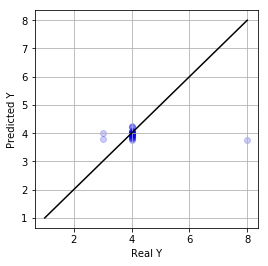

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred = regressor.predict(x_test)
plt.figure(figsize=(4,4))
plt.scatter(y_test2, y_pred, alpha=0.2, c="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [42]:
# Check the model (obtained parameters)
print('coefficients: ', regressor.coef_)
print('intercept: ', regressor.intercept_)

coefficients:  [ 0.04821981 -0.01193039 -0.06941139 ...  0.00472439 -0.01273923
  0.        ]
intercept:  3.982529489408695
